

# Project: The Movie Database Analysis
## By Eleojo .E. Adegbe
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#intro">Limitation</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database is home to a lot of metrics concerning movies. These metrics include the movies budget, revenue, popularity ,title, cast, reviews, runtime etc.
In this project i am working with a dataset that contains 10866 movies. I wish to analyze and point out the best month and day to release Action movies based on total movie revenue for each month and day and also based on the budget used to produce such movie.

### Question(s) posed
- When is the best time to release action movies?
- Does budget correlate with revenue?
- How long should an Action movie be?

### How answers were arrived at
The revenue and release date are the major variables used to arive at the answer in this project. The release date with the highest revenue was used to determine the best time to release an Action movie since the success of a movie is generally measured by its revenue. Any action movie producer would love this advice.

## Limitation
The major limitation is that production companies try as much to withold budget for movies and as such it is difficult to get the budget for some movies and also some of the budgets are estimated sums.

<a id='wrangling'></a>
## Data Wrangling

In this section of the project, i load in the data, check for cleanliness and tidiness issues in the data, and then trim and clean the dataset for analysis.Steps are clearly documented and justified.

### <font color='purple'>General Properties(Inspection)</font>
I used the `.shape, .info(), .describe(), .isnull() and .duplicated()` to quickly inspect the data.


### <font color='purple'>Assesment</font>
#### <font color='purple'>Quality issues</font>
- Null values exist in the dataset
- Release year should be changed to datetime type
- Drop duplicates
- Movies with budget less than $\$60000$ and revenue less than $\$368000$

#### <font color='purple'>Tidiness issues</font>
- genre column has more than one variable


### Data Cleaning 
**<font color='purple'>Quality and Tidiness issues</font>**

Here i addressed all issues stated in the assessment.


<a id='eda'></a>
## Exploratory Data Analysis


##### Revenue Vs Budget

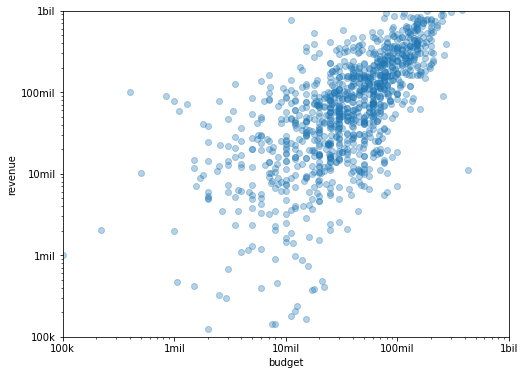

In [60]:
plt.figure(figsize=[8,6])

sb.regplot(data=df2,x='budget',y='revenue',fit_reg=False,scatter_kws={'alpha':1/3});
plt.xscale('log');
plt.yscale('log');
plt.xlim(10**5,10**9);
plt.ylim(10**5,10**9)
xloc=[100000,1000000,10000000,100000000,1000000000]
xlabel=['100k','1mil','10mil','100mil','1bil']
yloc=[100000,1000000,10000000,100000000,1000000000]
ylabel=['100k','1mil','10mil','100mil','1bil']
plt.xticks(xloc,xlabel);
plt.yticks(xloc,xlabel);

Here we begin to see a kind of trend from budget of about $\$10million$  and above . With an increase in budget comes a gentle steady increase in revenue.

There is no clear correlation between revenue and popularity

#### Revenue Vs Month

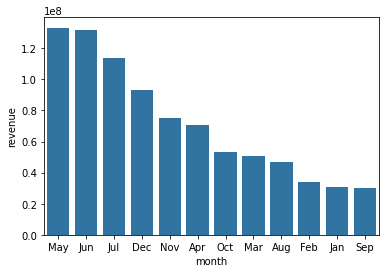

In [39]:
color=sb.color_palette()[0]
order=df2.groupby('month').mean()['revenue'].sort_values(ascending=False).index.tolist()
sb.barplot(data=df2,x='month',y='revenue',color=color,ci=None,order=order);
# plt.yscale('log')
# order

May and June have the highest mean revenues even though they dont have the highest number of releases.August had the highest number of releases but is fouth to the last in revenues.

#### Revenue Vs Day

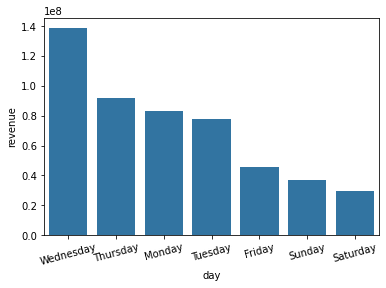

In [43]:
order=df2.groupby('day').mean()['revenue'].sort_values(ascending=False).index.tolist()
sb.barplot(data=df2,x='day',y='revenue',color=color,ci=None,order=order);
plt.xticks(rotation=15);

This plot shows that wednesdays have the highest revenue.

***Revenue Vs Month Vs Day***

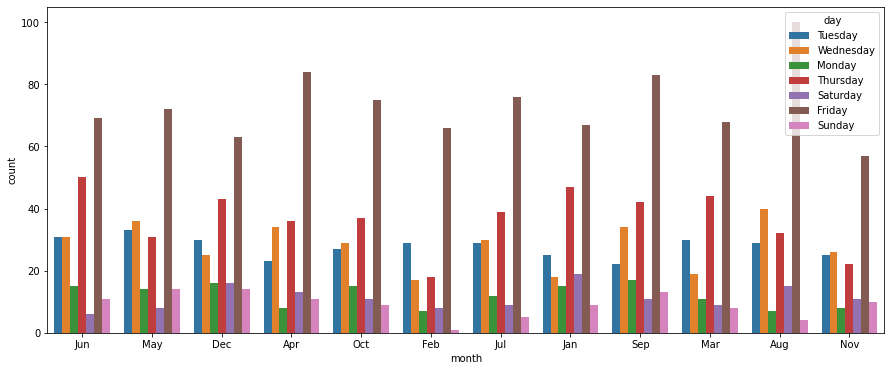

In [65]:
plt.figure(figsize=[15,6])
sb.countplot(data=df2,x='month',hue='day');

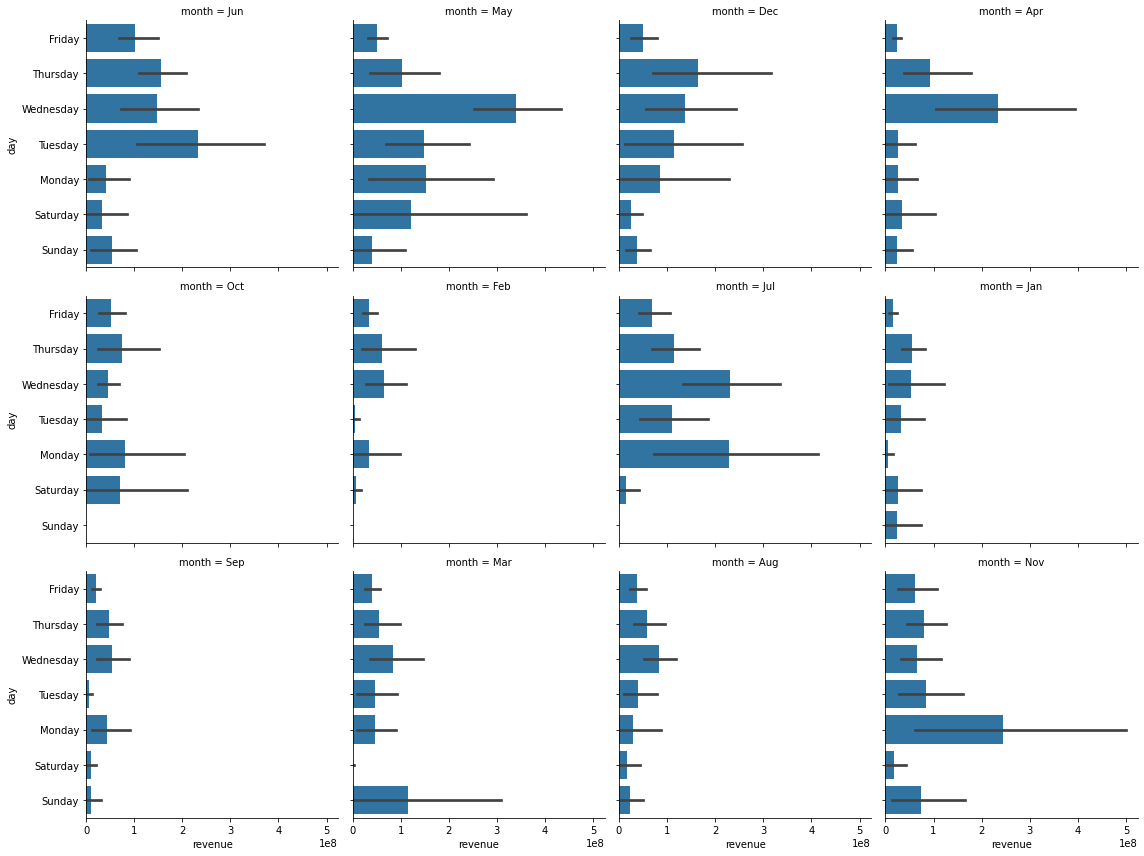

In [83]:
order=df2.day.value_counts().index

g=sb.FacetGrid(data=df2, col='month', height=4 ,col_wrap=4,);
g.map(sb.barplot,'revenue','day',order=order);


> This first plot above clearly shows that Fridays in August has the highest release of Action movies but the second plot shows that Wednesdays in May have the produce the highest revenues in average.

<a id='conclusions'></a>
## Conclusions

    From the analysis made on the movie database on when to release Action movies with the Revenue as the determining factor(variable) it is advisory to release an Action Movie in May and preferably on a Wednesday as this month proves to produce the heighest revenue of over 160m dollars over the years from 1966 -2015. It will also do good to spend heavily in action movies as shown by the analysis over the years in other to get more revenue as there is a correlation between between budget and revenue. Finally Action movies that have a runtime of about 100mins make more revenues.
